In [1]:

%matplotlib inline


# Various Agglomerative Clustering on a 2D embedding of digits

An illustration of various linkage option for agglomerative clustering on
a 2D embedding of the digits dataset.

The goal of this example is to show intuitively how the metrics behave, and
not to find good clusters for the digits. This is why the example works on a
2D embedding.

What this example shows us is the behavior 'rich getting richer' of
agglomerative clustering that tends to create uneven cluster sizes.

This behavior is pronounced for the average linkage strategy,
that ends up with a couple of clusters with few datapoints.

The case of single linkage is even more pathologic with a very
large cluster covering most digits, an intermediate size (clean)
cluster with most zero digits and all other clusters being drawn
from noise points around the fringes.

The other linkage strategies lead to more evenly distributed
clusters that are therefore likely to be less sensible to a
random resampling of the dataset.


In [2]:

# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014
from time import time
import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target
n_samples, n_features = X.shape
np.random.seed(0)

In [3]:

# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f'${digit}$',
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [4]:

# ----------------------------------------------------------------------
# 2D embedding of the digits dataset
print('Computing embedding')
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print('Done.')

Computing embedding
Done.


ward :	0.07s
average :	0.05s
complete :	0.05s
single :	0.02s


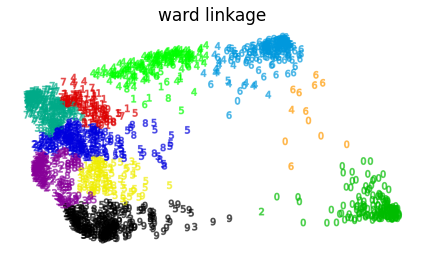

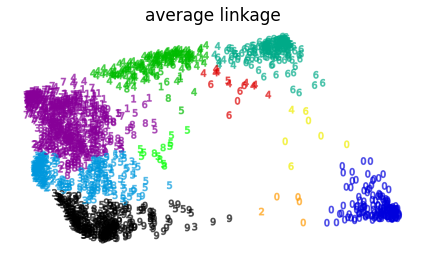

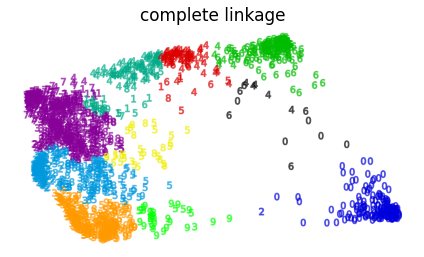

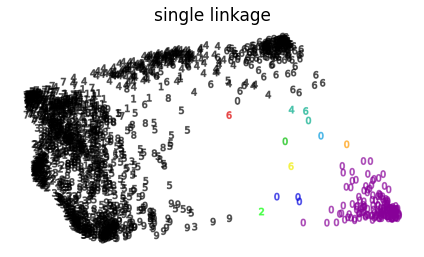

In [5]:

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print('%s :\t%.2fs' % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, '%s linkage' % linkage)
plt.show()